<a href="https://colab.research.google.com/github/alyabdulfatah/KMeans/blob/master/k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [0]:
#  select random points
def init_centroids(X, k):
  m, n = X.shape                #Different data ==>X.shape
  centroids = np.zeros((k, n))
  idx = np.random.randint(0, m, k)
    
  for i in range(k):
    centroids[i,:] = X[idx[i],:]
    return centroids


In [0]:
## centroid function
def find_closest_centroids(X, centroids):
  m = X.shape[0]            #300
  k = centroids.shape[0]    #3
  idx = np.zeros(m)   

  for i in range(m):
    min_dist = 1000000
    for j in range(k):
      dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
      if dist < min_dist:
        min_dist = dist
        idx[i] = j

  return idx


In [0]:
## centroid maker
def compute_centroids(X, idx, k):
  m, n = X.shape                   #Different data ==>X.shape
  centroids = np.zeros((k, n))
    
  for i in range(k):
    indices = np.where(idx == i)
    centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
  return centroids

In [0]:
## k means function
def run_k_means(X, initial_centroids, max_iters):  
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)

    return idx, centroids

In [0]:
def pca(X):
#    # normalize the features
  X = (X - X.mean()) / X.std()
    
# compute the covariance matrix
  X = np.matrix(X)
  cov = (X.T * X) / X.shape[0]
  print('cov \n', cov)
  print()
#    # perform SVD
  U, S, V = np.linalg.svd(cov) # singular value decomposition
    
  return U, S, V


In [0]:
def project_data(X, U, k):
  
  U_reduced = U[:,:k]
  return np.dot(X, U_reduced)

In [0]:
def recover_data(Z, U, k):

  U_reduced = U[:,:k]
  return np.dot(Z, U_reduced.T)

In [91]:
#load data

data = loadmat('/content/data.mat')
#print(data)
#print(data['X'])
print(data['X'].shape)


(300, 2)


In [92]:
# classify points 
X = data['X']
#initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
initial_centroids = np.array([[8, 0], [8, 6], [0, 3]])
#initial_centroids =  init_centroids(X, 3)
print(initial_centroids )


[[8 0]
 [8 6]
 [0 3]]


In [93]:
#selection
idx = find_closest_centroids(X, initial_centroids)
print(idx)

[2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 2. 2. 2. 0. 2. 0. 2. 2. 0. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 0. 2. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0. 2. 2. 2.
 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2.
 2. 0. 2. 0. 2. 0. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 2.
 1. 2. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 2. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 1. 2. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 2.]


In [94]:
#calculate new centroid
c = compute_centroids(X, idx, 3)
print(c)

[[5.54841788 2.2132898 ]
 [6.02789745 3.38558888]
 [2.33698832 3.1979171 ]]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[[8 0]
 [8 6]
 [0 3]]
[2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2.

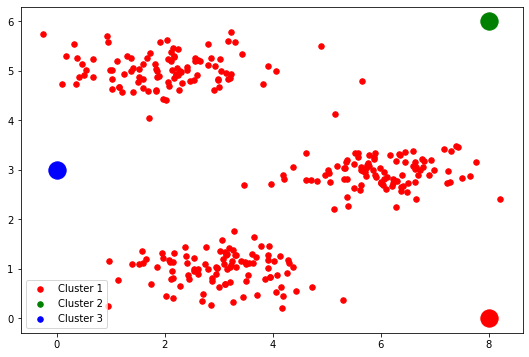

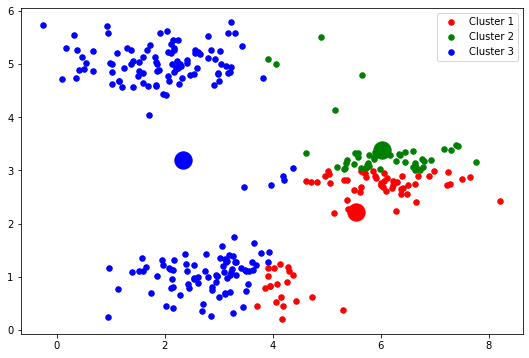

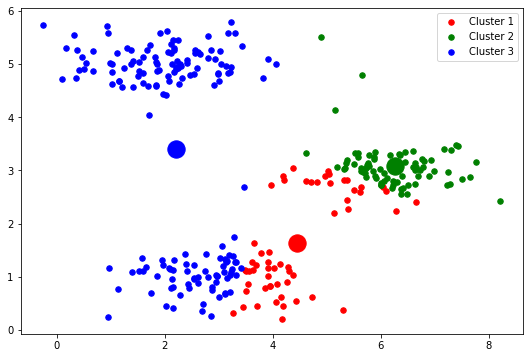

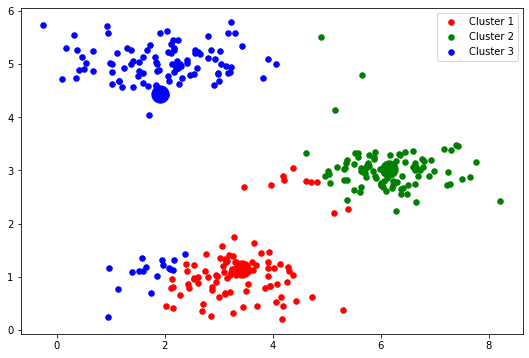

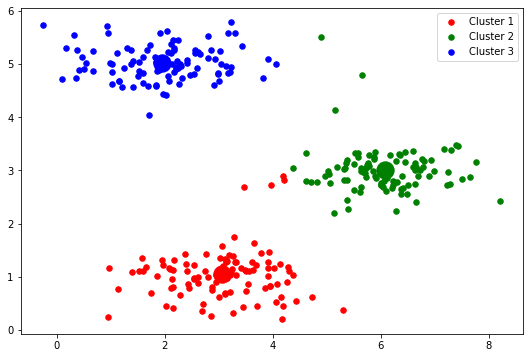

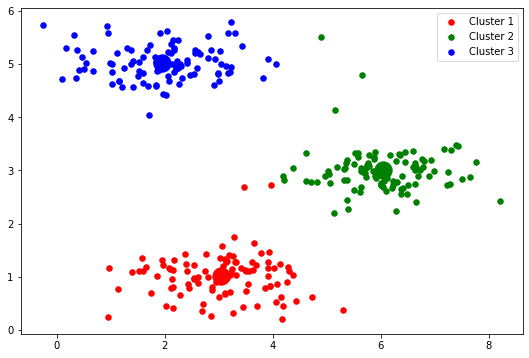

In [95]:
for x in range(6):
    # apply k means 
  idx, centroids = run_k_means(X, initial_centroids, x)
  print(idx)
  print()
  print(centroids )    
    # draw it
  cluster1 = X[np.where(idx == 0)[0],:]
  cluster2 = X[np.where(idx == 1)[0],:]
  cluster3 = X[np.where(idx == 2)[0],:]
    
  fig, ax = plt.subplots(figsize=(9,6))
  ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
  ax.scatter(centroids[0,0],centroids[0,1],s=300, color='r')

  ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
  ax.scatter(centroids[1,0],centroids[1,1],s=300, color='g')
    
  ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
  ax.scatter(centroids[2,0],centroids[2,1],s=300, color='b')
    
  ax.legend()
